# 모듈

In [274]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

# 이미지 읽기

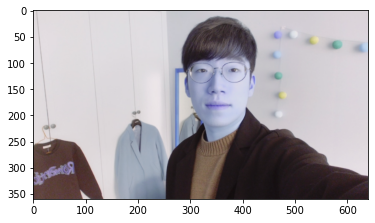

(360, 640, 3)

In [304]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()
img_bgr.shape

# HOG ( Histogram of Oriented Gradient )

In [276]:
detector_hog = dlib.get_frontal_face_detector()

In [277]:
# RGB로 변환 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

In [278]:
# 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [279]:
landmark_predictor 

In [280]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

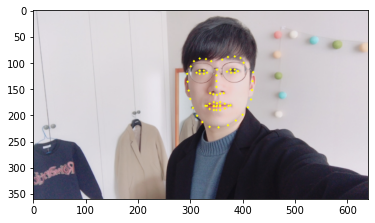

In [281]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [282]:
# 
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33]) # nose center index : 30
    x = landmark[33][0]
    y = landmark[33][1] 
    # print(dir(dlib_rect))
    w = dlib_rect.width()
    h = dlib_rect.width() # 정사각형이므로
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(351, 161)
(x,y) : (351,161)
(w,h) : (156,156)


# 스티커 이미지 Load

(156, 156, 3)


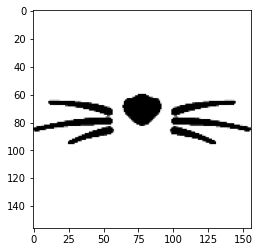

In [283]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/mustache.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지를 얼굴 범위에 맞추어 Resize
print (img_sticker.shape)                    # (156, 156, 3)
plt.imshow(img_sticker)

# 테스트 이미지 출력

In [296]:
# Left Top Y cordianate , Right Bottom Y Cordinate, Left Top X corinate, Right Bottom X cordinate
sticker_area = img_show[y - gap : y+gap , x- gap : x+ gap]
img_show[y-gap : y+gap , x - gap : x + gap] = \
np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8) # 0은 검정색을 의미 #255는 흰색을 의미

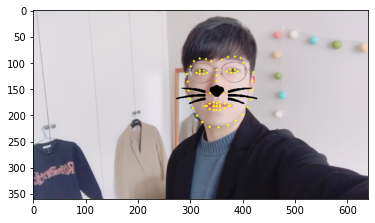

In [303]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

# 최종 결과물 출력

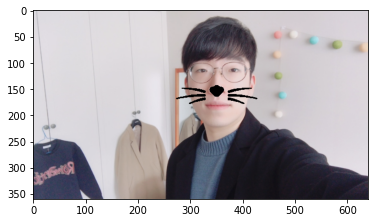

In [305]:
sticker_area = img_bgr[y - gap : y+gap , x- gap : x+ gap]
img_bgr[y-gap : y+gap , x - gap : x + gap] = \
np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8) # 0은 검정색을 의미 #255는 흰색을 의미
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()